#### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수예측
- 데이터셋 : 임의의 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터분포가 선형 분포여야함!

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 14개에 데이터셋
grade=range(7,70,7)
print(len(grade), grade[-1])
hour=range(1,19,2)
print(len(hour))

9 63
9


In [2]:
# List => DataFrame으로 변환
hourDF=pd.DataFrame(hour,columns=['Hour'])
print(hourDF.head())

gradeSR=pd.Series(grade)
print(gradeSR.head())

   Hour
0     1
1     3
2     5
3     7
4     9
0     7
1    14
2    21
3    28
4    35
dtype: int64


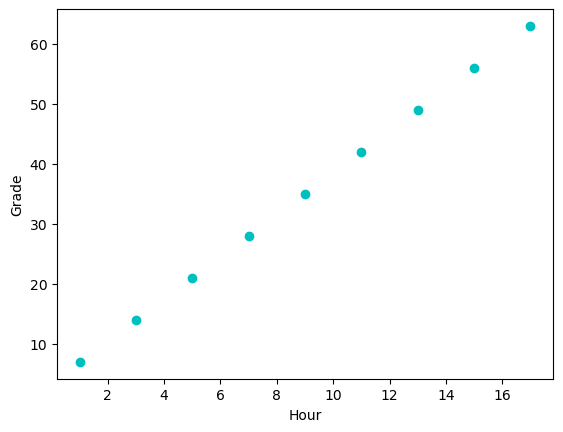

In [3]:
### 현제 데이터의 분포 확인
plt.plot(hourDF,gradeSR,'co')
plt.xlabel('Hour')
plt.ylabel('Grade')
plt.show()

[2] 학습 진행

In [4]:
# 모듈로딩 
from sklearn.linear_model import LinearRegression

In [5]:
# 인스턴스생성
model=LinearRegression()
# 학습진행
model.fit(hourDF,gradeSR)

LinearRegression()

In [6]:
# 학습후 모델 파라미터
print(f'기울기 : {model.coef_}  절편 : {model.intercept_}')

기울기 : [3.5]  절편 : 3.4999999999999964


In [7]:
# y=ax+b
pre_grade=model.coef_[0]*hourDF+model.intercept_
pre_grade=pre_grade.values.reshape(-1)

In [8]:
# 실제 점수와 예측점수의 차이 확인
real_grade=gradeSR.to_numpy()
real_grade-pre_grade 

array([3.55271368e-15, 1.77635684e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

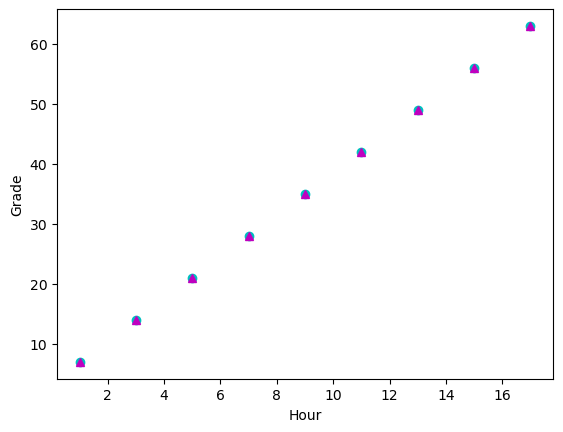

In [9]:
### 현제 데이터의 분포 확인
plt.plot(hourDF,gradeSR,'co')
plt.plot(hourDF,pre_grade,'m^')
plt.xlabel('Hour')
plt.ylabel('Grade')
plt.show()

[3] 모델 성능 평가

In [10]:
model.score(hourDF,gradeSR)

1.0

In [11]:
### 오차계산 즉, 손실/비용함수 확인
### - root_mean_squared_error upto v1.4
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
pre_y=model.predict(hourDF)

In [15]:
mse=mean_squared_error(gradeSR,pre_y)
rmse=mse=mean_squared_error(gradeSR,pre_y,squared=False)
mae=mean_absolute_error(gradeSR,pre_y)
r2=r2_score(gradeSR,pre_y)

## 손실/비용함수 값은 0에 가까울 수록
## 결정계수 값은 1에 가까울수록 성능 GOOD
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 1.3240182150652123e-15
rmse : 1.3240182150652123e-15
mae : 5.921189464667501e-16
r2 : 1.0
